In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.400.maxp10.root")


In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.Integral("width"))
#     h1.Scale(1.0/h1.GetEntries())

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_mc_stable_nKaons_evt', 'h_mc_stable_Kaon_cos', 'h_mc_quark_cos', 'h_mc_quark_sep', 'h_mc_quark_m', 'h_mc_quark_pp', 'h_mc_quark_pz', 'h_mc_quark_E', 'h_mc_quark_p', 'h_mc_stable_isr_p', 'h_pfo_Kaon_cos', 'h_pfo_LeadKaons_abscos', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cosAdd', 'h_pfo_LeadK_phiDiff', 'h_pfo_k_mult_jet', 'h_pfo_jet_angdiff', 'h_pfo_jet_mult', 'h_pfo_jet_mult_uu', 'h_pfo_jet_mult_dd', 'h_pfo_jet_mult_ss', 'h_pfo_jet_LeadK_cos', 'h_pfo_jet_charge', 'h_pfo_jet_charge_u', 'h_pfo_jet_charge_ubar', 'h_pfo_jet_charge_d', 'h_pfo_jet_charge_dbar', 'h_pfo_jet_charge_s', 'h_pfo_jet_charge_sbar', 'h_pfo_q_match_charge', 'h_pfo_qbar_match_charge', 'h_pfo_LeadK_q_match_charge', 'h_pfo_LeadK_qbar_match_charge', 'h_pfo_LeadK_p', 'h_pfo_LeadK_p_10']


In [6]:
h_mc_quark_cos = file1.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos = file1.Get("h_pfo_LeadKaons_cos")

makePretty(h_mc_quark_cos,kBlack)
makePretty(h_pfo_LeadKaons_cos,kBlue)

### Flip the Histogram (d -> K+Pi)

In [7]:
nbinsX = h_mc_quark_cos.GetNbinsX()
h_mc_quark_cos_flip = TH1F("h_mc_quark_cos_flip",";cos#theta;Entries (Norm.)",100,-1.0,1.0)
makePretty(h_mc_quark_cos_flip,kBlack)

for binX in range(1,nbinsX+1):
    binContent = h_mc_quark_cos.GetBinContent(binX)
    binX_flip = nbinsX+1 - binX
    h_mc_quark_cos_flip.SetBinContent(binX_flip,binContent)

In [8]:
Normal(h_mc_quark_cos_flip)
Normal(h_pfo_LeadKaons_cos)

In [9]:
c1 = TCanvas("c1","c1",500,500)

In [10]:
h_mc_quark_cos.GetXaxis().SetTitle("cos#theta_{d,K^{-}}");

h_mc_quark_cos_flip.Rebin(2)
h_pfo_LeadKaons_cos.Rebin(2)

h_mc_quark_cos_flip.Draw("h")
h_pfo_LeadKaons_cos.Draw("hsame")

In [11]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_mc_quark_cos_flip,"Parton Level dd","fp")
leg.AddEntry(h_pfo_LeadKaons_cos,"LeadK Reco","fp")
leg.Draw()

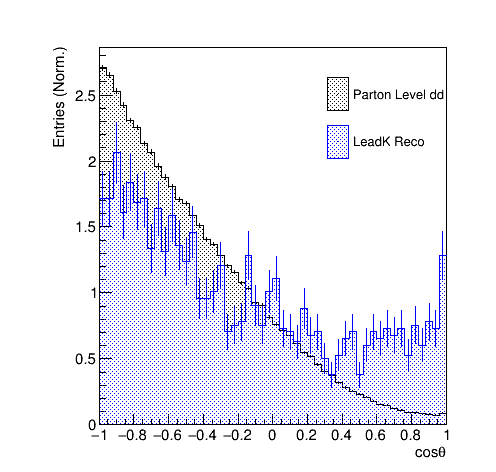

In [12]:
c1.Draw()

### Now let's fit the function

In [13]:
fgen  = TF1("fgen","[0]*(1+x*x)+[1]*x",-1.0,1.0)
freco = TF1("freco","[0]*(1+x*x)+[1]*x",-1.0,1.0)

fgen.SetParNames("S","A")
freco.SetParNames("S","A")

h_mc_quark_cos_flip.Fit("fgen","MNRS")
h_pfo_LeadKaons_cos.Fit("freco","MNRS")

fgen.SetLineStyle(2)
fgen.SetLineColor(kGreen+1)

freco.SetLineStyle(2)
freco.SetLineColor(kGray+3)

 FCN=612.92 FROM HESSE     STATUS=OK             10 CALLS          82 TOTAL
                     EDM=5.51739e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  S            7.48816e-01   1.24020e-03   3.10124e-06  -5.53232e-03
   2  A           -1.41338e+00   2.67532e-03   3.13412e-06  -2.24391e-03
 FCN=62.4335 FROM HESSE     STATUS=OK             10 CALLS          69 TOTAL
                     EDM=9.92719e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  S            7.26471e-01   1.65726e-02   1.20834e-05  -2.86813e-06
   2  A           -6.17214e-01   4.04403e-02   2.94858e-05  -4.08458e-07


In [14]:
c2 = TCanvas("c2","c2",500,500)

In [15]:
h_mc_quark_cos_flip.GetYaxis().SetRangeUser(0,3.0)
h_mc_quark_cos_flip.Draw("h")
h_pfo_LeadKaons_cos.Draw("same")
fgen.Draw("same")
freco.Draw("same")

In [16]:
leg2 = TLegend(0.5,0.85,0.75,0.65,"","brNDC")
leg2.SetFillColor(kWhite)
leg2.SetBorderSize(0)
leg2.SetTextSize(0.03)
leg2.AddEntry(h_mc_quark_cos_flip,"Gen","f")
leg2.AddEntry(h_pfo_LeadKaons_cos,"Reco","pl")
leg2.AddEntry(fgen,"Gen Fit","l")
leg2.AddEntry(freco,"Reco Fit","l")
leg2.Draw()

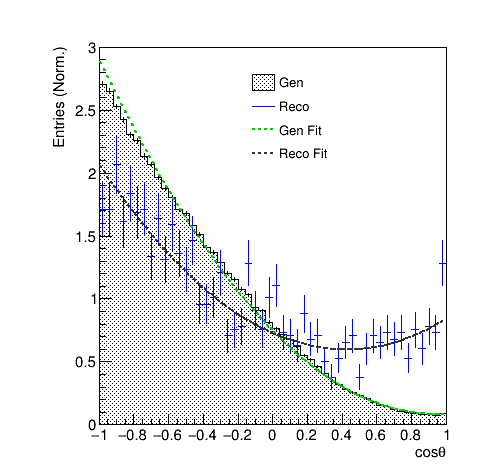

In [17]:
c2.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```